<a href="https://colab.research.google.com/github/BasitHussain5/UG-Final-Thesis-Project/blob/main/Hybride_Model_for_Crop_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'maizdataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4546520%2F7771587%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241007%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241007T134738Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D21e7ac5d76f2b2e40aa551a0f9b62ad76d13d746cf697566b2622fc234f822e1a96a7d756d682c4992c7a9a56ff8ac64d30fcfaf87a2aca69f558682a56f8da494b8ee6bf259d4435c74d5e349322e02d69ceaff13d4e4cf0715615069ddbaf1d28d8c58e2bc79488fa839875eb43f62d9a237aa7e6008ed68ecac75a1322dc92aee3564da439d054456accefbe333eb05430d5736ded0936fb6ce91d8857faa2f999a0ee73f858dec7f78e30910c373fc158086c6a31bad9baf2cb70e6215b166723df9b71700cf5eeb9e0d9a1196c3bd64fa7c3aa6f24dc48c11a11d7534d1a856d0dda441f63aad01cf425b24747972d027785cc38734150708c809c56fb3,data-after-au:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4594418%2F7837765%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241007%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241007T134738Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D934a867a9961546527e5970b942e0e13874cb1f5a75fe1e32f8e8449e70b0333b3e241411cec7a296e777a76e84a6db84afb2912061a3bd13184c27d546a11901590556f9e9611e8f421784c33f1760a3febca1f5213b28c1fd14f500aa11be3e7d9f25f6ff3b7aaf797a4a1a5b518f75172dc3f735c92a3be7c71ec816e2ea3726ca23b77adf42799e3dcaa858631c76d1494f2eb97d6cbf07596e1aee7b5ca29c295197e6a23c86b1fe935eae9bb8bff345826bb03cbfbf7380cd638c67700c2ff521f35be6a3a702548850a7e0511bb8ee380c2413f4a1b1b9be7d48269546d7a606068d9bd94605cf46d64647db8cc1e9d6325385eaa3fa91251e89cf172,validation-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4639144%2F7899550%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241007%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241007T134738Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2093656d0ba53a03f6836192cfb41a2ff57dfa99b1b5987c296fb07b07d4af23093aafc554850e1054656027846670b052616c5d190e3a46dff1191ae590068ecc300eeb34dea7a255b0978414a4a12a318fb887b3d782eae250daa3b639dc0d8cf09a3122353746b8948a666b57df6181b8f08e71870ed7b50e657d19d4bb7be7f5e7f468e1bd720232143e062b56c0cc6a4d00835af416b304901c3fce26df789a81b173dd355f5b1df43680246009a889733c9be1275a34d82f76c84cde35d59ff02193b84e7a51628d379330c2ecb0bd82b017c5fb7754566e22cb3ced2cde9e44c1ae1dba9d4808712a4597ee5a59aecd8178093a18e4369f2eca9dbc29,training-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4639168%2F7899583%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241007%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241007T134738Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D251363daefc810d67fe542b20a8cd1eb8f411925e96657d29dfc9b0419318ebcc11ff75549c5ff93d43c99f08c2e7e1980b0afcfb973cd81d6053537293f627b25377e91c434c1b1455285702349a7be369878b54938c8e9eb61cc0336a6cd672897bf924c7b80239356956083a5eb0ed98d98702a8ed57aed6adcea6758bfe2e209c812b0b6b7032c43c5bc24c402b6af6db092f05d92c6467fc7571f9bb57e27361cebab4bbf8f93059b328b75e3e3efdabcfdb3d14caab84ebfa4c4ec3e059eb306ad42210fefa138c895fe46a6991cf27734a6fe05ae9e0f983e46b9797e7e83c05925cfd20e970807ec71f2a03df6268758c5e26912a037d7d2b1c169d8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Load DataSet

In [ ]:
# Step 1: Import required libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm
import time
import numpy as np
import matplotlib.pyplot as plt
from torch import optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Path to your dataset
data_dir = '/kaggle/input/maizdataset/maizdataset'

# Step 2: Set up data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset and split into training and validation sets
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Splitting dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Print class names to verify
print("Classes:", dataset.classes)

# Step 4: Instantiate pre-trained MobileViT and DaViT models from timm
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Classes: ['HEATHLY', 'MLN_1_and_MLN_2', 'MSV_1', 'MSV_2']


# Building Hybride Model

- Fusion of MobileVit & Davit

In [ ]:
class EnsembleModel(nn.Module):
    def __init__(self, mobilevit, davit, num_classes):
        super(EnsembleModel, self).__init__()
        self.mobilevit = mobilevit
        self.davit = davit
        self.fc1 = nn.Linear(num_classes * 2, 512)  # First fully connected hidden layer
        self.relu = nn.ReLU()  # Activation function
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer to prevent overfitting
        self.fc2 = nn.Linear(512, num_classes)  # Final output layer

    def forward(self, x):
        out_mobilevit = self.mobilevit(x)
        out_davit = self.davit(x)
        out = torch.cat((out_mobilevit, out_davit), dim=1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Load pre-trained MobileViT and fine-tune
mobilevit = timm.create_model('mobilevit_s', pretrained=True, num_classes=len(dataset.classes))
mobilevit = mobilevit.to(device)
for param in mobilevit.parameters():  # Fine-tuning: Unfreeze all layers
    param.requires_grad = True

# Load pre-trained DaViT and fine-tune
davit = timm.create_model('davit_small', pretrained=True, num_classes=len(dataset.classes))
davit = davit.to(device)
for param in davit.parameters():  # Fine-tuning: Unfreeze all layers
    param.requires_grad = True

# Create the ensemble model
ensemble_model = EnsembleModel(mobilevit, davit, num_classes=len(dataset.classes)).to(device)


model.safetensors:   0%|          | 0.00/22.4M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/199M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/timm/models/_hub.py:190: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(cached_file, map_location='cpu')
/opt/conda/

In [ ]:
# Optimizer and loss function
optimizer = torch.optim.Adam(ensemble_model.parameters(), lr=0.0001, weight_decay=1e-5)  # Lower LR for fine-tuning
criterion = nn.CrossEntropyLoss()

# Learning rate scheduler for better optimization
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

In [ ]:
# # Step 5: Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(ensemble_model.parameters(), lr=1e-5)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)


# Function to calculate GPU memory usage
def get_gpu_memory_usage():
    return torch.cuda.memory_allocated() / (1024 * 1024)  # in MB

# Training

In [ ]:
epochs = 30
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []  # Corrected initialization
gpu_memory_usage = []
time_per_epoch = []


for epoch in range(epochs):
    start_time = time.time()

    # Training phase
    ensemble_model.train()
    running_loss, running_corrects, total_samples = 0, 0, 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = ensemble_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate metrics
        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels).item()
        total_samples += labels.size(0)

    train_loss = running_loss / total_samples
    train_acc = running_corrects / total_samples
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation phase
    ensemble_model.eval()
    val_running_loss, val_running_corrects, val_total_samples = 0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = ensemble_model(inputs)
            loss = criterion(outputs, labels)

            # Accumulate metrics
            val_running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_running_corrects += torch.sum(preds == labels).item()
            val_total_samples += labels.size(0)

    val_loss = val_running_loss / val_total_samples
    val_acc = val_running_corrects / val_total_samples
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    # Measure GPU memory and time
    memory_gpu = get_gpu_memory_usage()
    gpu_memory_usage.append(memory_gpu)
    elapsed_time = time.time() - start_time
    time_per_epoch.append(elapsed_time)

    # Print progress for each epoch
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, GPU Memory: {memory_gpu:.2f} MB, Time: {elapsed_time:.2f}s")

Epoch 1/30, Train Loss: 0.2918, Train Acc: 0.8864, Val Loss: 0.1618, Val Acc: 0.9352, GPU Memory: 865.78 MB, Time: 636.75s
Epoch 2/30, Train Loss: 0.1622, Train Acc: 0.9382, Val Loss: 0.1756, Val Acc: 0.9306, GPU Memory: 865.78 MB, Time: 635.46s
Epoch 3/30, Train Loss: 0.1350, Train Acc: 0.9502, Val Loss: 0.1869, Val Acc: 0.9277, GPU Memory: 865.78 MB, Time: 635.70s
Epoch 4/30, Train Loss: 0.1131, Train Acc: 0.9589, Val Loss: 0.1612, Val Acc: 0.9388, GPU Memory: 865.78 MB, Time: 635.60s
Epoch 5/30, Train Loss: 0.0956, Train Acc: 0.9651, Val Loss: 0.1557, Val Acc: 0.9485, GPU Memory: 865.78 MB, Time: 635.66s
Epoch 6/30, Train Loss: 0.0639, Train Acc: 0.9779, Val Loss: 0.1818, Val Acc: 0.9365, GPU Memory: 865.78 MB, Time: 635.23s
Epoch 7/30, Train Loss: 0.0551, Train Acc: 0.9824, Val Loss: 0.1706, Val Acc: 0.9443, GPU Memory: 865.78 MB, Time: 635.15s
Epoch 8/30, Train Loss: 0.0402, Train Acc: 0.9857, Val Loss: 0.2171, Val Acc: 0.9362, GPU Memory: 865.78 MB, Time: 635.25s
Epoch 9/30, Trai

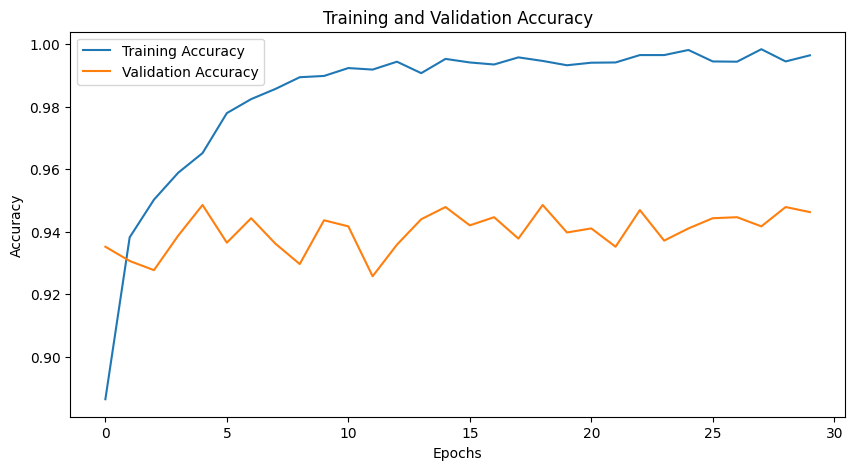

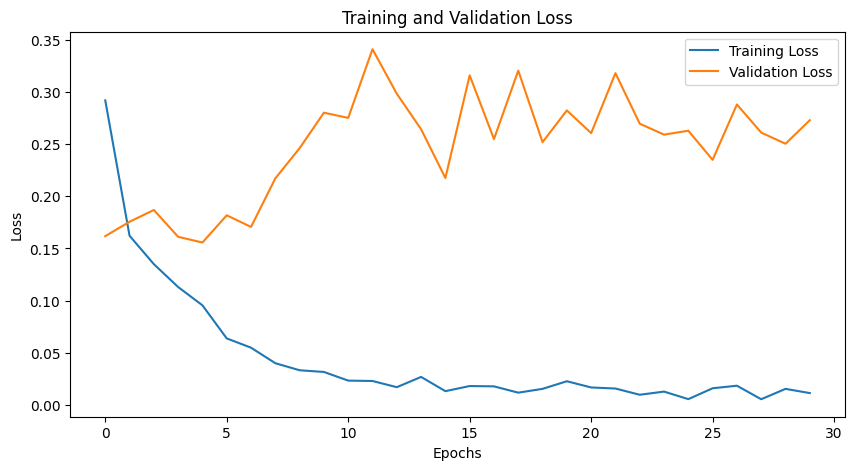

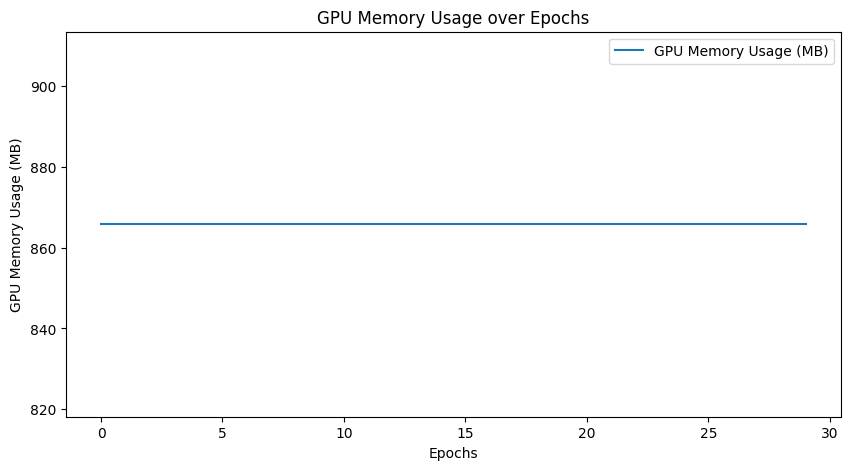

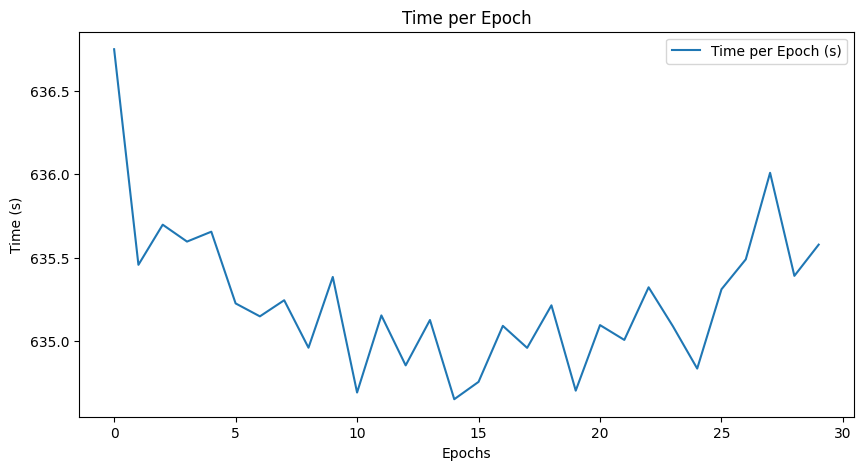

In [ ]:
# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot GPU Memory Usage per epoch
plt.figure(figsize=(10, 5))
plt.plot(gpu_memory_usage, label='GPU Memory Usage (MB)')
plt.xlabel('Epochs')
plt.ylabel('GPU Memory Usage (MB)')
plt.title('GPU Memory Usage over Epochs')
plt.legend()
plt.show()

# Plot time per epoch
plt.figure(figsize=(10, 5))
plt.plot(time_per_epoch, label='Time per Epoch (s)')
plt.xlabel('Epochs')
plt.ylabel('Time (s)')
plt.title('Time per Epoch')
plt.legend()
plt.show()

In [ ]:
# Classification report and confusion matrix on validation set
all_preds, all_labels = [], []
ensemble_model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = ensemble_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
class_report = classification_report(all_labels, all_preds, target_names=dataset.classes)
print("Classification Report:\n", class_report)

Classification Report:
                  precision    recall  f1-score   support

        HEATHLY        1.00      1.00      1.00      1066
MLN_1_and_MLN_2        0.98      1.00      0.99       768
          MSV_1        0.90      0.89      0.89       647
          MSV_2        0.89      0.89      0.90       589

     accuracy                              0.96      3070
      macro avg        0.94      0.95      0.95      3070
   weighted avg        0.95      0.96      0.96      3070


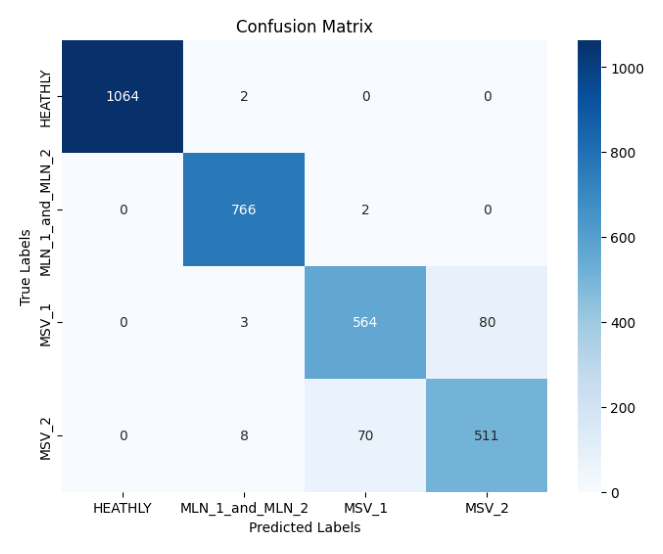

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Thank YOU!